<a href="https://colab.research.google.com/github/FaizanHameed1/Document-Classification-with-PySS3/blob/main/Pathema_Document_Classification_with_PySS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

In [4]:
#%cd '/content/drive/My Drive/Kaggle/'

In [4]:
#!mkdir pathema_ss3 #making new folder for preparing our data for PySS3 model

In [5]:
#%cd '/content/drive/My Drive/Kaggle/pathema_ss3/'

In [5]:
#training dataset directory
source_path='/content/drive/My Drive/Kaggle/pathema/'
dest_path='/content/drive/My Drive/Kaggle/pathema_ss3/train/'

In [ ]:
#making folders in our "dest_path"
root_path = dest_path
folders = ['Requisition Form','Patient Profile','Other','Lab Test','Cover Page','Consult Note','Clinical History And Summary','Admin Note']
for folder in folders:
    os.mkdir(os.path.join(root_path,folder))


print(os.listdir(dest_path))

['Requisition Form', 'Patient Profile ', 'Other', 'Lab Test', 'Cover Page', 'Consult Note', 'Clinical History And Summary', 'Admin Note']


In [6]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,948 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
import numpy as np

#to extract text from the document we are applying OCR to each document
def apply_ocr(sample):

        # apply ocr to the image
        #Extracting words and bounding boxes from images
        ocr_dframe = pytesseract.image_to_data(sample, output_type='data.frame')
        #return a subset of the DataFrame's columns based on the column dtypes.
        float_cols = ocr_dframe.select_dtypes('float').columns
        #dropping the rows where atleast one element is not present(i.e "text" is not present)
        ocr_dframe = ocr_dframe.dropna().reset_index(drop=True)
        #selecting float_cols,round along zero,changing type to integer
        ocr_dframe[float_cols] = ocr_dframe[float_cols].round(0).astype(int)
        #replace field that's entirely space (or empty) with NaN check https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
        ocr_dframe = ocr_dframe.replace(r'^\s*$', np.nan, regex=True)
        #dropping the rows where atleast one element is not present(i.e "text" is not present)
        ocr_dframe = ocr_dframe.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_dframe.text if str(word) != 'nan'])
        words = list(ocr_dframe.text)#making the list of column "text" in 'ocr_dframe' dataframe
        #words = [str(w) for w in words] #converting into list of string of words from the last words list 

        #making a list of words in the image
        image_words=[]
        for word in words:
          if str(word)!="nan":
            image_words.append(str(word))

      
        #joining words with space
        words= " ".join(image_words)
        return words

In [ ]:
from PIL import Image
#getting image file directory
#image_path=[]
for folder in os.listdir(source_path):
  folder_path=os.path.join(source_path,folder)
  for files in os.listdir(folder_path):
    f_path=os.path.join(folder_path,files)#path of image
    image = Image.open(f_path)
    image = image.convert("RGB")
    para=apply_ocr(image) #getting words from image
    
    #making directory to save the files with same file and folder name
    #if files.endswith((".png", ".jpg")):
    #  txt_name=files.strip

    txt_file=os.path.splitext(files)[0] + ".txt" #making same name of file as image
    txt_path=os.path.join(dest_path,os.path.join(folder,txt_file))
    #writing and saving file
    with open(txt_path, "w") as file:
      file.write(para)
    #print(files)

    #image_path.append(f_path)

#print(image_path)

In [ ]:
#File extraction
#import os, zipfile

#dir_name = '/content/'
#extension = ".zip"

#os.chdir(dir_name) # change directory from working dir to dir with files

#for item in os.listdir(dir_name): # loop through items in dir
#    if item.endswith(extension): # check for ".zip" extension
#        file_name = os.path.abspath(item) # get full path of files
#        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
#        zip_ref.extractall(dir_name) # extract file to dir
#        zip_ref.close() # close file
#        os.remove(file_name) # delete zipped file

In [7]:
##test dataset directory
test_source="/content/Pathema"
test_dest='/content/drive/My Drive/Kaggle/pathema_ss3/test/'

In [ ]:
#creating folders in "test_dest" to copy files

root_path = test_dest
folders = ['Requisition Form','Patient Profile','Other','Lab Test','Cover Page','Consult Note','Clinical History And Summary','Admin Note']
for folder in folders:
    os.mkdir(os.path.join(root_path,folder))


print(os.listdir(test_dest))

['Requisition Form', 'Patient Profile', 'Other', 'Lab Test', 'Cover Page', 'Consult Note', 'Clinical History And Summary', 'Admin Note']


In [ ]:
#Creating text files from document's text
#image_path=[]
for folder in os.listdir(test_source):
  folder_path=os.path.join(test_source,folder)
  for files in os.listdir(folder_path):
    f_path=os.path.join(folder_path,files)#path of image
    image = Image.open(f_path)
    image = image.convert("RGB")
    para=apply_ocr(image) #getting words from image
    
    #making directory to save the files with same file and folder name
    #if files.endswith((".png", ".jpg")):
    #  txt_name=files.strip

    txt_file=os.path.splitext(files)[0] + ".txt" #making same name of file as image
    txt_path=os.path.join(test_dest,os.path.join(folder,txt_file))
    #writing and saving file
    with open(txt_path, "w") as file:
      file.write(para)
    #print(files)

    #image_path.append(f_path)

#print(image_path)

In [8]:
!pip install pyss3

     |████████████████████████████████| 2.0 MB 7.4 MB/s 


In [9]:
%matplotlib inline
import re

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span
from pyss3.server import Live_Test

from sklearn.metrics import accuracy_score
from nltk.stem import SnowballStemmer

In [10]:
#defining functions for preprocessing text
stemmer = SnowballStemmer('english')

def stem(match):
    return stemmer.stem(match.group(0))

def my_preprocessing(text):
    # replace each word (\w+) with its stemmed version
    return re.sub(r"\w+", stem, text)

In [11]:
print(dest_path)
print(test_dest)

/content/drive/My Drive/Kaggle/pathema_ss3/train/
/content/drive/My Drive/Kaggle/pathema_ss3/test/


In [12]:
#loading train and test data
x_train, y_train = Dataset.load_from_files(dest_path)
x_test, y_test = Dataset.load_from_files(test_dest)

[8/8] Loading 'Admin Note' documents: 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]


In [13]:
#preprocessing the data(for further details check https://pyss3.readthedocs.io/en/latest/tutorials/custom-preprocessing.html)
x_train_prep = [my_preprocessing(doc) for doc in x_train]
x_test_prep = [my_preprocessing(doc) for doc in x_test]

In [14]:
#default hypermaters
clf = SS3()
s, l, p, _ = clf.get_hyperparameters()

print("Smoothness(s):", s)
print("Significance(l):", l)
print("Sanction(p):", p)

Smoothness(s): 0.45
Significance(l): 0.5
Sanction(p): 1


In [15]:
#using default hyperparameters
clf = SS3(s=.45, l=.5, p=.1)

# Let the training begin!
clf.train(x_train_prep, y_train, n_grams=3, prep=False)#details on https://pyss3.readthedocs.io/en/latest/tutorials/custom-preprocessing.html)

Training on 'Requisition Form': 100%|██████████| 8/8 [00:00<00:00, 10.14it/s]


In [16]:
#checking model performance on test data(without preprocessing)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy was:", accuracy)

Classification: 100%|██████████| 255/255 [00:05<00:00, 50.94it/s]

Accuracy was: 0.6823529411764706


In [17]:
#checking model performance on test data(with preprocessed text)
y_pred = clf.predict(x_test_prep, prep=False)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy was:", accuracy)

Classification: 100%|██████████| 255/255 [00:05<00:00, 49.61it/s]

Accuracy was: 0.6666666666666666


Classification: 100%|██████████| 255/255 [00:05<00:00, 48.74it/s]



                              precision    recall  f1-score   support

                  Admin Note       0.92      0.65      0.76        34
Clinical History And Summary       0.25      0.07      0.11        41
                Consult Note       0.68      0.95      0.79       125
                  Cover Page       0.81      0.92      0.86        24
                    Lab Test       0.18      0.25      0.21         8
                       Other       0.00      0.00      0.00        16
             Patient Profile       0.60      0.75      0.67         4
            Requisition Form       0.00      0.00      0.00         3

                    accuracy                           0.67       255
                   macro avg       0.43      0.45      0.43       255
                weighted avg       0.59      0.67      0.61       255


 Accuracy: 0.671

[ updating evaluations cache ]


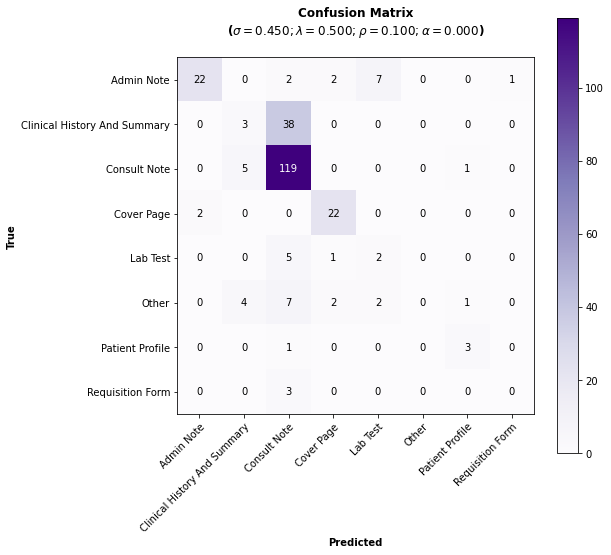

0.6705882352941176

In [18]:
#classification report & Confusion Matrix
Evaluation.test(clf, x_test_prep, y_test)

In [19]:
###########Optimizing hyperparameters###########

In [20]:
clf = SS3(name="Doc_class")

# to speed up the process, we won't use 3-gram but single words
# (i.e. we won't use the n_grams=3 argument)
clf.train(x_train_prep, y_train, prep=False)

Training on 'Requisition Form': 100%|██████████| 8/8 [00:00<00:00, 14.66it/s]


In [21]:
#searching best hyperparameters
best_s, best_l, best_p, best_a = Evaluation.grid_search(
    clf, x_test_prep, y_test,
    s=span(0.2, 0.8, 6),
    l=span(0.1, 2, 6),
    p=span(0.5, 2, 6),
    a=[0, .1, .2],
    prep=False,  # <- do not forget to disable default preprocessing
    tag="grid search (test)"
)

print("The hyperparameter values that obtained the best Accuracy are:")
print("Smoothness(s):", best_s)
print("Significance(l):", best_l)
print("Sanction(p):", best_p)
print("Alpha(a):", best_a)

Evaluation.plot()

Grid search: 100%|██████████| 648/648 [02:39<00:00,  4.06it/s]


The hyperparameter values that obtained the best Accuracy are:
Smoothness(s): 0.32
Significance(l): 1.24
Sanction(p): 0.8
Alpha(a): 0.0


True

In [22]:
#with optimized hyperparameters
clf.set_hyperparameters(0.32, 1.24, 0.8, 0.0)
y_pred = clf.predict(x_test_prep, prep=False)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy was:", accuracy)

Classification: 100%|██████████| 255/255 [00:00<00:00, 15195.24it/s]

Accuracy was: 0.7176470588235294


In [23]:
#training 3gram version with same(optimized) hyperparaeters
clf = SS3(0.32, 1.24, 0.8, 0.0, name="Doc_class")

clf.train(x_train_prep, y_train, n_grams=3, prep=False)

Training on 'Requisition Form': 100%|██████████| 8/8 [00:00<00:00,  9.18it/s]


In [24]:
y_pred = clf.predict(x_test_prep, prep=False)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy was:", accuracy)

Classification: 100%|██████████| 255/255 [00:05<00:00, 50.87it/s]

Accuracy was: 0.6980392156862745


Classification: 100%|██████████| 255/255 [00:07<00:00, 34.88it/s]



                              precision    recall  f1-score   support

                  Admin Note       1.00      0.79      0.89        34
Clinical History And Summary       0.30      0.15      0.20        41
                Consult Note       0.71      0.90      0.80       125
                  Cover Page       0.69      1.00      0.81        24
                    Lab Test       1.00      0.25      0.40         8
                       Other       1.00      0.12      0.22        16
             Patient Profile       0.43      0.75      0.55         4
            Requisition Form       0.00      0.00      0.00         3

                    accuracy                           0.69       255
                   macro avg       0.64      0.50      0.48       255
                weighted avg       0.70      0.69      0.65       255


 Accuracy: 0.694

[ updating evaluations cache ]


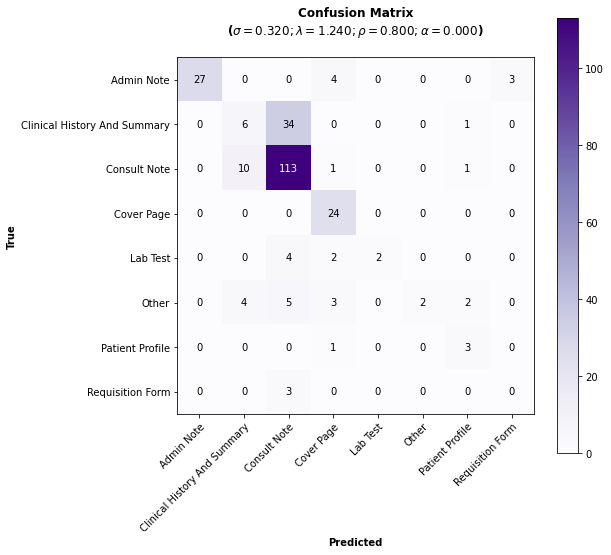

0.6941176470588235

In [25]:
#classification report & Confusion Matrix
Evaluation.test(clf, x_test_prep, y_test)